In [1]:
import pandas as pd

df = pd.read_csv('./data/flats_dirty.csv')
df.head()

,url,Rynek,Cena,Powierzchnia,Cena za m2,Liczba pokoi,Piętro,Liczba pięter,Czynsz administracyjny,Rodzaj nieruchomości,...,Liczba oddzielnych toalet,Powierzchnie pokoi,Powierzchnia przedpokoju,Powierzchnia kuchni,Cena za garaż/Miejsce parkingowe,Zobacz spacer 360°,Stan mieszkania,Ciepła woda,Rodzaj ogrzewania,Typ okien
0,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,450 000 zł,38.66 m2,11 640 zł,2,0,3,443.28,Mieszkanie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,520 000 zł,32.92 m2,15 796 zł,1,0,7,NaN,Mieszkanie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,690 000 zł,71.87 m2,9 601 zł,3,3,4,436.00,Mieszkanie,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,250 000 zł,33.29 m2,7 510 zł,1,0,2,332.91,Mieszkanie,...,NaN,"17,20",3.2,"9,00 m2",0 zł,NaN,NaN,NaN,NaN,NaN
4,https://freedom.pl/oferta/mieszkanie-na-sprzed...,Wtórny,798 000 zł,85.26 m2,9 360 zł,3,3,3,700.00,Mieszkanie,...,NaN,NaN,NaN,NaN,80 000 zł,NaN,NaN,NaN,NaN,NaN


In [2]:
df1 = df.copy()
df1.columns

Index(['url', 'Rynek', 'Cena', 'Powierzchnia', 'Cena za m2', 'Liczba pokoi',
       'Piętro', 'Liczba pięter', 'Czynsz administracyjny',
       'Rodzaj nieruchomości', 'Stan nieruchomości', 'Umeblowanie',
       'Dostępne od', 'Numer oferty', 'Rodzaj budynku', 'Rok budowy',
       'Materiał', 'Winda', 'Domofon', 'Wysokość pomieszczeń (cm)',
       'Podłogi w pomieszczeniach', 'Typ kuchni', 'Liczba łazienek',
       'Garaż/Miejsca parkingowe',
       'Informacje o Garażu/Miejscach parkingowych',
       'Liczba miejsc parkingowych', 'Adres', 'Komunikacja', 'W pobliżu',
       'opis', 'Typ mieszkania', 'Balkon', 'Alarm', 'Monitoring', 'Ochrona',
       'Recepcja', 'Teren ogrodzony', 'Liczba oddzielnych toalet',
       'Powierzchnie pokoi', 'Powierzchnia przedpokoju', 'Powierzchnia kuchni',
       'Cena za garaż/Miejsce parkingowe', 'Zobacz spacer 360°',
       'Stan mieszkania', 'Ciepła woda', 'Rodzaj ogrzewania', 'Typ okien'],
      dtype='object')

## Data analysis

### Rynek

In [3]:
df1['Rynek'] = df['Rynek'].astype('category')
df1['Rynek'].value_counts()

Rynek
Wtórny       69
Pierwotny     1
Name: count, dtype: int64

### Cena całkowita

In [4]:
df1["Cena"] = df["Cena"].str.replace(" zł", "").str.replace(" ", "").astype(float)
df1["Cena"].describe()

count    7.000000e+01
mean     6.452011e+05
std      2.298485e+05
min      2.500000e+05
25%      4.750000e+05
50%      5.994500e+05
75%      7.987500e+05
max      1.270000e+06
Name: Cena, dtype: float64

### Powierzchnia

Text(0.5, 0, 'Powierzchnia [m2]')

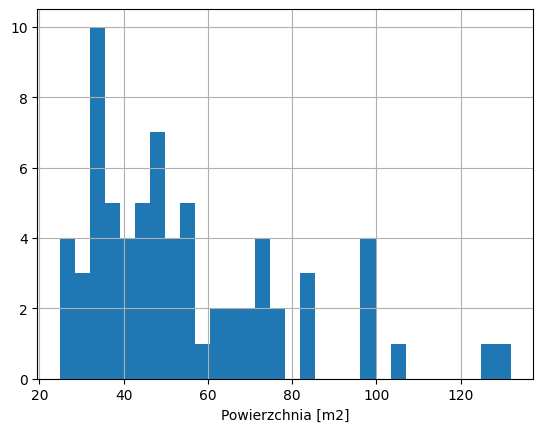

In [5]:
df1["Powierzchnia"] = df["Powierzchnia"].str.replace(" m2", "").str.replace(",", ".").astype(float)
df1["Powierzchnia"].hist(bins=30).set_xlabel("Powierzchnia [m2]")

### Cena za m2

Text(0.5, 0, 'Cena za metr [zł/m2]')

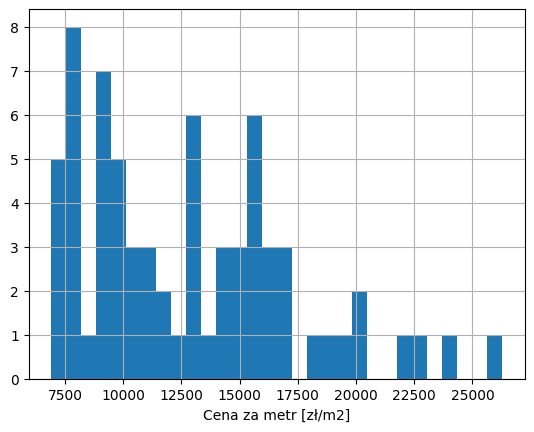

In [6]:
df1["Cena za m2"] = df["Cena za m2"].str.replace(" zł", "").str.replace(" ", "").astype(float)
df1["Cena za m2"].hist(bins=30).set_xlabel("Cena za metr [zł/m2]")

### Czynsz administracyjny

In [7]:
for (idx, row) in df[df["Czynsz administracyjny"].isna()][["Numer oferty", "opis"]].iterrows():
    numer_oferty = row.iloc[0]
    opis = row.iloc[1]
    x = row['opis'].find("czynsz")
    print(numer_oferty, opis[x-64:x+37])

29044/3685/OMS 
24123/3685/OMS 
31096/3685/OMS 
21279/3685/OMS Apartament jest obsługiwany i wynajmowany przez hotel ze stałym czynszem najmu w wysokości 39 tys. zł
29243/3685/OMS Apartament jest obsługiwany i wynajmowany przez hotel ze stałym czynszem najmu w wysokości 25480  zł.


In [8]:
df.loc[df["Numer oferty"]=="21279/3685/OMS", "Czynsz administracyjny"] = 39000 / 12
df.loc[df["Numer oferty"]=="29243/3685/OMS", "Czynsz administracyjny"] = 25480 / 12

Text(0.5, 0, 'Czynsz administracyjny [zł]')

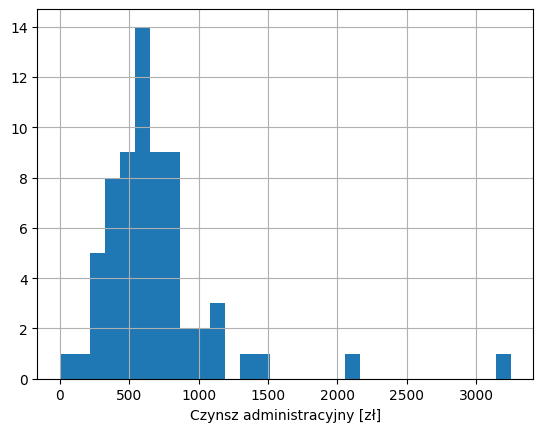

In [12]:
df1["Czynsz administracyjny"] = df["Czynsz administracyjny"].astype(float)
df1["Czynsz administracyjny"].hist(bins=30).set_xlabel("Czynsz administracyjny [zł]")

### Rodzaj nieruchomości

In [21]:
df1["Rodzaj nieruchomości"] = df["Rodzaj nieruchomości"].astype('category')
df1["Rodzaj nieruchomości"].cat.categories

Index(['Mieszkanie'], dtype='object')

### Stan nieruchomości

In [25]:
df1["Stan nieruchomości"] = df["Stan nieruchomości"].astype('category')
df1["Stan nieruchomości"].cat.categories

Index(['Bardzo dobry', 'Do adaptacji', 'Do drobnego remontu',
       'Do kapitalnego remontu', 'Do odnowienia', 'Do odświeżenia',
       'Do remontu', 'Do wykończenia', 'Dobry', 'Idealny', 'Po remoncie',
       'Stan deweloperski'],
      dtype='object')

In [29]:
df1["Umeblowanie"] = df["Umeblowanie"].astype('category')
df1["Umeblowanie"].cat.categories

Index(['Częściowo', 'Możliwe', 'Nie', 'Tak'], dtype='object')

### Dostępne od

Text(0.5, 0, 'Dostępne od')

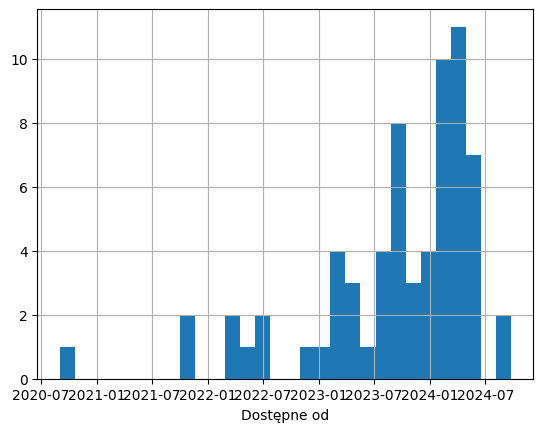

In [41]:
df1["Dostępne od"] = df["Dostępne od"].astype('datetime64[ns]')
df1["Dostępne od"].hist(bins=30).set_xlabel("Dostępne od")

### Numer oferty

In [44]:
df["Numer oferty"].isna().sum()

0

### Rodzaj budynku

In [46]:
df1["Rodzaj budynku"] = df["Rodzaj budynku"].astype('category').cat.categories

Index(['Apartamentowo-handlowy', 'Biurowo-handlowy', 'Budynek apartamentowy',
       'Część domu', 'Dom', 'Hotel', 'Kamienica', 'Mieszkalno-biurowy',
       'Niski blok', 'Segment'],
      dtype='object')